In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


↓ 受過良好訓練這樣寫：）

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [16]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
len(x_train)

25000

In [6]:
len(x_test)

25000

In [7]:
x_train[87]

[1,
 61,
 795,
 203,
 30,
 6,
 227,
 7,
 6,
 1361,
 18,
 51,
 45,
 290,
 570,
 150,
 48,
 25,
 459,
 195,
 10,
 10,
 1907,
 1698,
 144,
 28,
 77,
 3670,
 6,
 2300,
 1523,
 1338,
 18,
 154,
 698,
 372,
 8,
 79,
 312,
 23,
 268,
 14,
 22,
 9,
 995,
 4,
 8171,
 228,
 9,
 35,
 8236,
 17,
 26,
 4,
 578,
 5323,
 3729,
 15,
 2,
 1719,
 56,
 8,
 931,
 23,
 4,
 1321,
 1103,
 11,
 4,
 1749,
 18,
 463,
 449,
 13,
 79,
 12,
 14,
 9,
 691,
 6,
 8338,
 5,
 7524,
 20,
 93,
 3084,
 34,
 94,
 2,
 631,
 956,
 5,
 4905,
 2,
 3981,
 671,
 8,
 2,
 1426,
 23,
 35,
 311,
 772,
 41,
 544,
 584,
 13,
 100,
 1227,
 842,
 4,
 1588,
 120,
 33,
 312,
 211,
 3413,
 5611,
 68,
 2,
 120,
 4,
 4197,
 2,
 15,
 2,
 14,
 431,
 249,
 136,
 776,
 4905,
 1027,
 8,
 2,
 41,
 2,
 2,
 23,
 4,
 890,
 7,
 1316,
 11,
 6,
 2,
 428,
 2727,
 1735,
 24,
 163,
 24,
 204,
 24,
 221,
 24,
 6,
 52,
 20,
 4,
 693,
 241,
 675,
 9,
 4,
 959,
 7,
 2,
 120,
 9719,
 92,
 437,
 129,
 58]

In [8]:
# 看前10筆評論的長度
for i in range(10):
    print(len(x_train[i]), end=', ')

218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 

In [12]:
#? np.mean(len(x_train))

25000.0

**！送進去Keras長度必須一樣**

In [17]:
from keras.preprocessing import sequence

In [18]:
x_train = sequence.pad_sequences(x_train, maxlen=250)
x_test = sequence.pad_sequences(x_test, maxlen=250)

In [19]:
for i in range(10):
    print(len(x_train[i]), end=', ')

250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 

In [20]:
# x_trash = sequence.pad_sequences(x_train, maxlen=150)

In [21]:
x_train.shape

(25000, 250)

In [22]:
x_train[87]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         61,  795,  203,   30,    6,  227,    7,    6, 1361,   18,   51,
         45,  290,  570,  150,   48,   25,  459,  195,   10,   10, 1907,
       1698,  144,   28,   77, 3670,    6, 2300, 1523, 1338,   18,  154,
        698,  372,    8,   79,  312,   23,  268,   14,   22,    9,  995,
          4, 8171,  228,    9,   35, 8236,   17,   26,    4,  578, 5323,
       3729,   15,    2, 1719,   56,    8,  931,   23,    4, 1321, 1103,
         11,    4, 1749,   18,  463,  449,   13,   

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [24]:
model = Sequential()

In [25]:
model.add(Embedding(10000, 128))

In [26]:
model.add(LSTM(150))

In [27]:
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               167400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 1,447,551
Trainable params: 1,447,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='rnn.png')

![My first RNN](rnn.png)

In [30]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=2)

Epoch 1/2
25000/25000 [==============================] - 316s 13ms/step - loss: 0.4401 - acc: 0.7938
Epoch 2/2
25000/25000 [==============================] - 351s 14ms/step - loss: 0.2571 - acc: 0.8974


In [31]:
score = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 76s 3ms/step


In [32]:
print("loss:", score[0])
print("acc:", score[1])

loss: 0.475064203625
acc: 0.77216


In [33]:
x = np.linspace(-5,10,200)

In [34]:
lamba = 1.050700987
alpha = 1.673263242

In [35]:
x0 = x[x<=0]
x1 = x[x>0]

In [36]:
y0 = lamba * (alpha*np.exp(x0)-alpha)

In [37]:
y1 = lamba * x1

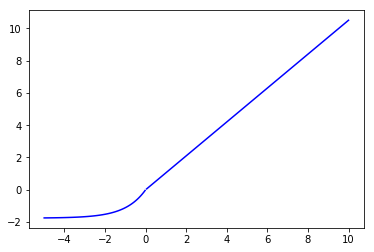

In [38]:
plt.plot(x0, y0, 'b')
plt.plot(x1, y1, 'b')
plt.show()

In [39]:
x = np.linspace(0,10,200)
y = np.sin(x) + 0.3*np.random.randn(200)

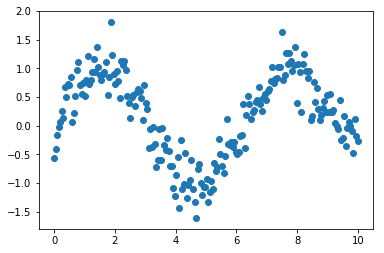

In [40]:
plt.scatter(x,y)